In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression


In [63]:
train=pd.read_csv("train_bm.csv")
train_org=pd.read_csv("train_bm.csv")
test=pd.read_csv("test_bm.csv")
test_org=pd.read_csv("test_bm.csv")

In [65]:
train['source']='train'
test['source']='test'

In [68]:
df=pd.concat([train,test])

In [70]:
df['Item_Weight'] = df['Item_Weight'].fillna(df.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

In [72]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({"LF":"Low Fat","reg":"Regular","low fat":"Low Fat"})

In [74]:
num_col = df.select_dtypes(include = np.number).columns
num_col
cate_col = df.select_dtypes(exclude = np.number).columns
cate_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source'],
      dtype='object')

In [73]:
 df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [67]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [58]:
train.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [59]:
train.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [60]:
num_col = train.select_dtypes(include = np.number).columns
num_col

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [61]:
cate_col = train.select_dtypes(exclude = np.number).columns
cate_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [75]:
df['Item_Ident_type']=df['Item_Identifier'].apply(lambda x: x[0:2])

In [136]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Ident_type,age
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,train,FD,14
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,train,DR,4
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,train,FD,14
3,19.20,Regular,0.000000,182.0950,NaN,Tier 3,Grocery Store,732.3800,train,FD,15
4,8.93,Low Fat,0.000000,53.8614,High,Tier 3,Supermarket Type1,994.7052,train,NC,26
...,...,...,...,...,...,...,...,...,...,...,...
5676,10.50,Regular,0.013496,141.3154,Small,Tier 1,Supermarket Type1,NaN,test,FD,16
5677,7.60,Regular,0.142991,169.1448,Medium,Tier 3,Supermarket Type2,NaN,test,FD,4
5678,10.00,Low Fat,0.073529,118.7440,NaN,Tier 2,Supermarket Type1,NaN,test,NC,11
5679,15.30,Regular,0.000000,214.6218,NaN,Tier 2,Supermarket Type1,NaN,test,FD,6


In [24]:
train.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].sum()

Outlet_Location_Type
Tier 1    4.482059e+06
Tier 2    6.472314e+06
Tier 3    7.636753e+06
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:>

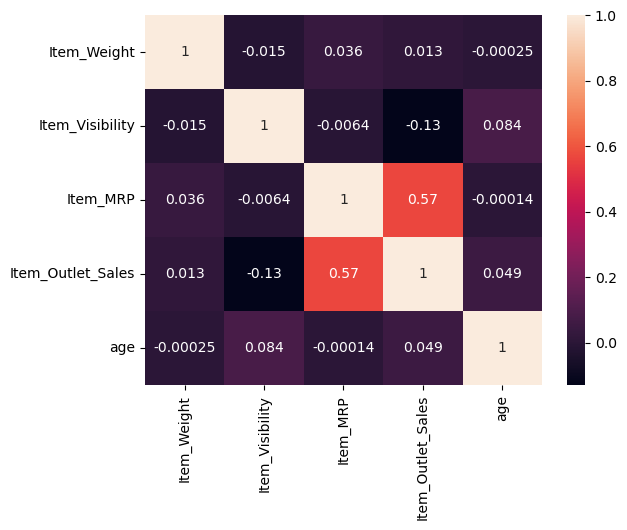

In [83]:
corr_=df.corr()
sns.heatmap(corr_,annot = True)

In [79]:
df['age'] = 2013 - df['Outlet_Establishment_Year']

In [85]:
df = df.drop(columns= 'Outlet_Establishment_Year')

KeyError: "['Outlet_Establishment_Year'] not found in axis"

In [86]:
df = df.drop(columns= 'Item_Identifier')

In [114]:
train = df.loc[df['source']=='train']
test = df.loc[df['source']=='test']

In [115]:
train.drop(columns= 'source', inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_9244\3028593453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns= 'source', inplace=True)


In [116]:
test.drop(columns= 'source', inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_9244\2193759452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns= 'source', inplace=True)


In [117]:
x = train.select_dtypes(include= np.number).drop(columns = "Item_Outlet_Sales")
vif_df = pd.DataFrame()
vif_df['feature'] = x.columns
vif_df['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [118]:
vif_df

,feature,VIF
0,Item_Weight,5.179357
1,Item_Visibility,2.453279
2,Item_MRP,4.485239
3,age,3.623556


In [119]:
df = df.drop(columns= 'Item_Type')

KeyError: "['Item_Type'] not found in axis"

In [127]:
df = df.drop(columns= 'Outlet_Identifier')

In [128]:
num_col = df.select_dtypes(include = np.number).drop(columns = ['Item_Outlet_Sales'])
cat_col = df.select_dtypes(exclude = np.number)
num_col


,Item_Weight,Item_Visibility,Item_MRP,age
0,9.30,0.016047,249.8092,14
1,5.92,0.019278,48.2692,4
2,17.50,0.016760,141.6180,14
3,19.20,0.000000,182.0950,15
4,8.93,0.000000,53.8614,26
...,...,...,...,...
5676,10.50,0.013496,141.3154,16
5677,7.60,0.142991,169.1448,4
5678,10.00,0.073529,118.7440,11
5679,15.30,0.000000,214.6218,6


In [129]:
df_cat_enc = pd.get_dummies(cat_col)

In [134]:
df_cat_enc

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,source_test,source_train,Item_Ident_type_DR,Item_Ident_type_FD,Item_Ident_type_NC
0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0
1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0
2,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0
3,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0
4,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0
5677,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
5678,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
5679,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0


In [138]:
df_final = pd.concat([num_col,df_cat_enc, df['source']],axis = 1)
df_final.to_excel("pre_Processed_data.xlsx",index = False)

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [141]:
data_proc = pd.read_excel("pre_Processed_data.xlsx")

In [147]:
data_proc_train = data_proc.loc[data_proc['source'] == 'train']
data_proc_test = data_proc.loc[data_proc['source'] == 'test']

In [148]:
del data_proc_train['source']
del data_proc_test['source']

In [149]:
train_org = pd.read_csv("train_bm.csv")

In [150]:
target = train_org['Item_Outlet_Sales']

In [152]:
lr = LinearRegression()
lr.fit(data_proc_train,target)
predict_train = lr.predict(data_proc_train)

In [154]:
predict_test = lr.predict(data_proc_test)

In [157]:
predict_test = abs(predict_test)
predict_test

array([1851.92462174, 1570.8434494 , 1874.82479443, ..., 1806.88585306,
       3563.0132281 , 1262.01076837])

In [159]:
submission = pd.read_csv("sample_submission.csv")
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


In [160]:
submission['Item_Outlet_Sales'] = predict_test

In [161]:
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1851.924622
1,FDW14,OUT017,1570.843449
2,NCN55,OUT010,1874.824794
3,FDQ58,OUT017,2589.338210
4,FDY38,OUT027,5178.532473
...,...,...,...
5676,FDB58,OUT046,2314.593161
5677,FDD47,OUT018,2431.489751
5678,NCO17,OUT045,1806.885853
5679,FDJ26,OUT017,3563.013228


In [162]:
submission.to_csv("Rathin_DS.csv", index= False)

In [163]:
print(r2_score(target,predict_train))

0.5635159124886048


In [164]:
print(mean_squared_error(target,predict_train))

1270954.0422448954
